In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('student.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
print("Categories in gender: ",end=" ")
print(df['gender'].unique())
print ("categories in race_ethnicity:",end='')
print(df['race_ethnicity'].unique())
print("categories in parental_level_of_education:",end='')
print(df['parental_level_of_education'].unique())
print("categories in lunch:",end='')
print(df['lunch'].unique())
print("categories in test_preparation_course:",end='')
print(df['test_preparation_course'].unique())

Categories in gender:  ['female' 'male']
categories in race_ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch:['standard' 'free/reduced']
categories in test_preparation_course:['none' 'completed']


In [12]:
##define categorical and numerical features
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']

In [13]:
##print columns
print('We have {} numerical features :{}'.format(len(numerical_features),numerical_features))
print('We have {} categorical_features:{}'.format(len(categorical_features),categorical_features)) 

We have 3 numerical features :['math_score', 'reading_score', 'writing_score']
We have 5 categorical_features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
##adding columns for total score and average
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average']=df['Total_score']/3

In [15]:
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [16]:
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full=df[df['math_score']==100]['Average'].count()

In [17]:
print(f'number of students with full marks in maths: {math_full}')
print(f'number of students with full marks in writing: {writing_full}')
print(f'number of students with full marks in reading: {reading_full}')

number of students with full marks in maths: 7
number of students with full marks in writing: 14
number of students with full marks in reading: 17


In [18]:
reading_less_20=df[df['reading_score']<=20]['Average'].count()
writing_less_20=df[df['writing_score']<=20]['Average'].count()
math_less_20=df[df["math_score"]<=20]['Average'].count()

In [19]:
print(f'number of students score less than 20 in reading: {reading_less_20}')
print(f'number of students score less than 20 in writing: {writing_less_20}')
print(f'number of students score less than 20 in maths: {math_less_20}')

number of students score less than 20 in reading: 1
number of students score less than 20 in writing: 3
number of students score less than 20 in maths: 4


In [20]:
####histogram and kde

<Axes: xlabel='Average', ylabel='Count'>

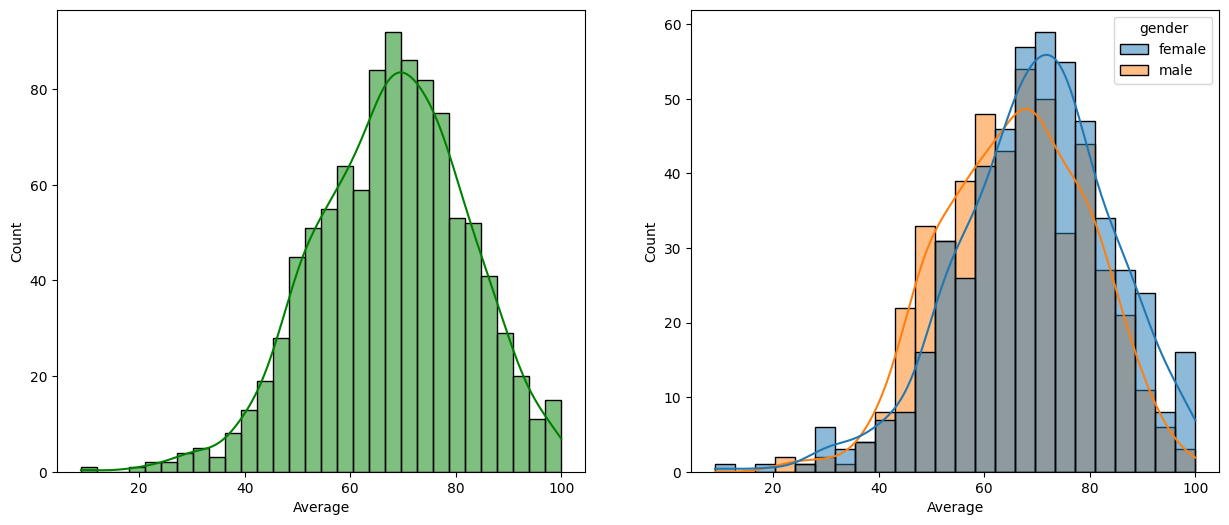

In [21]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')

<Axes: xlabel='Total_score', ylabel='Count'>

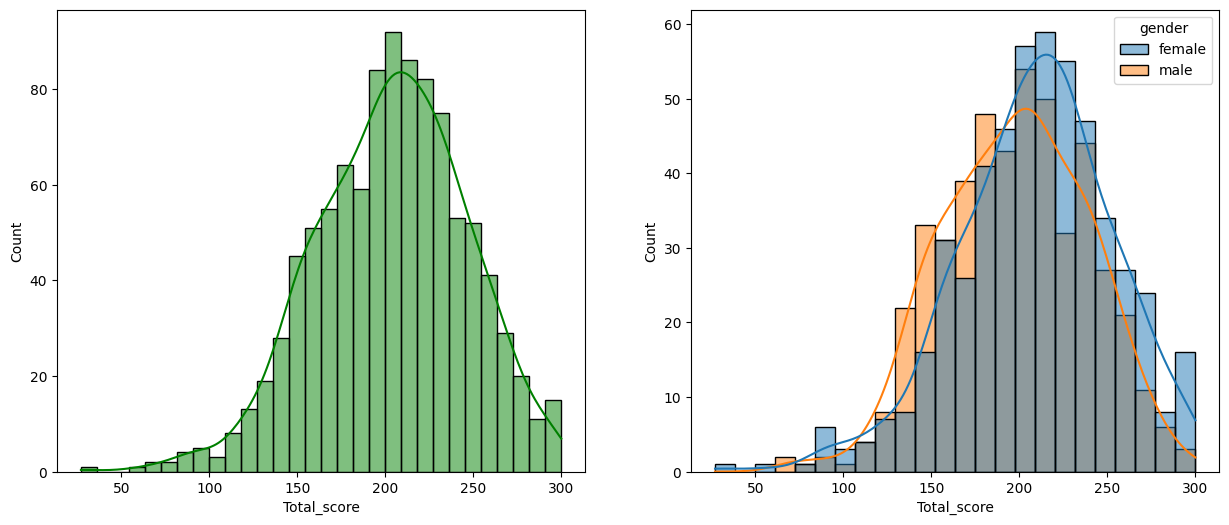

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')

<Axes: xlabel='Average', ylabel='Count'>

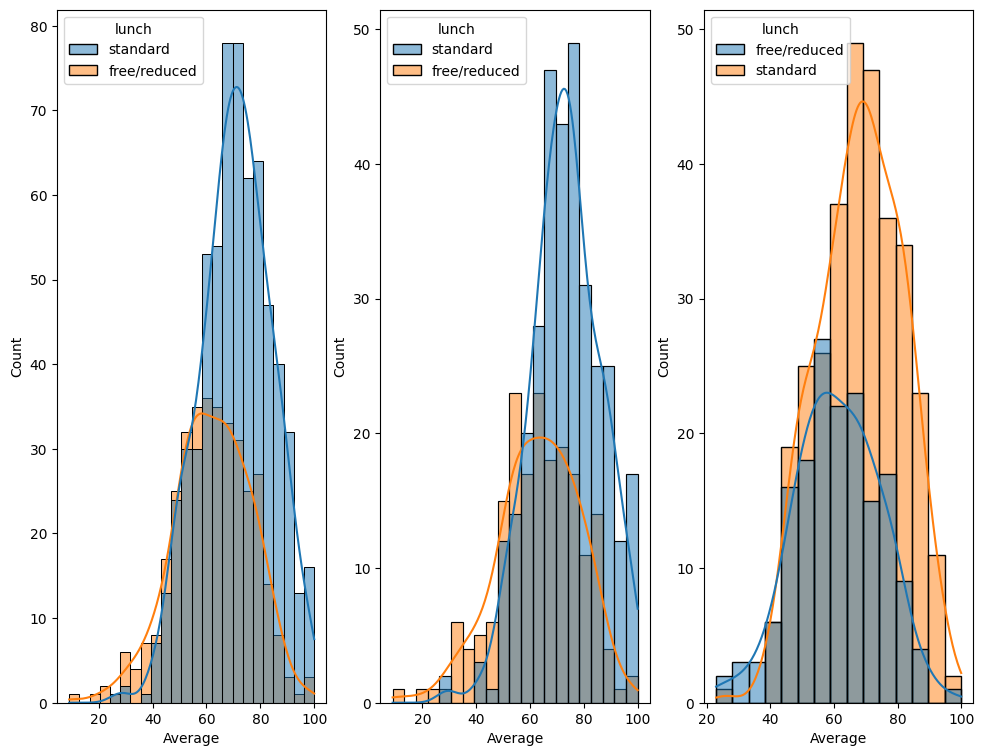

In [27]:
plt.subplots(1,3,figsize=(16,9))
plt.subplot(141)
sns.histplot(x='Average',data=df,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="Average",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",kde=True,hue="lunch")

<Axes: xlabel='Average', ylabel='Count'>

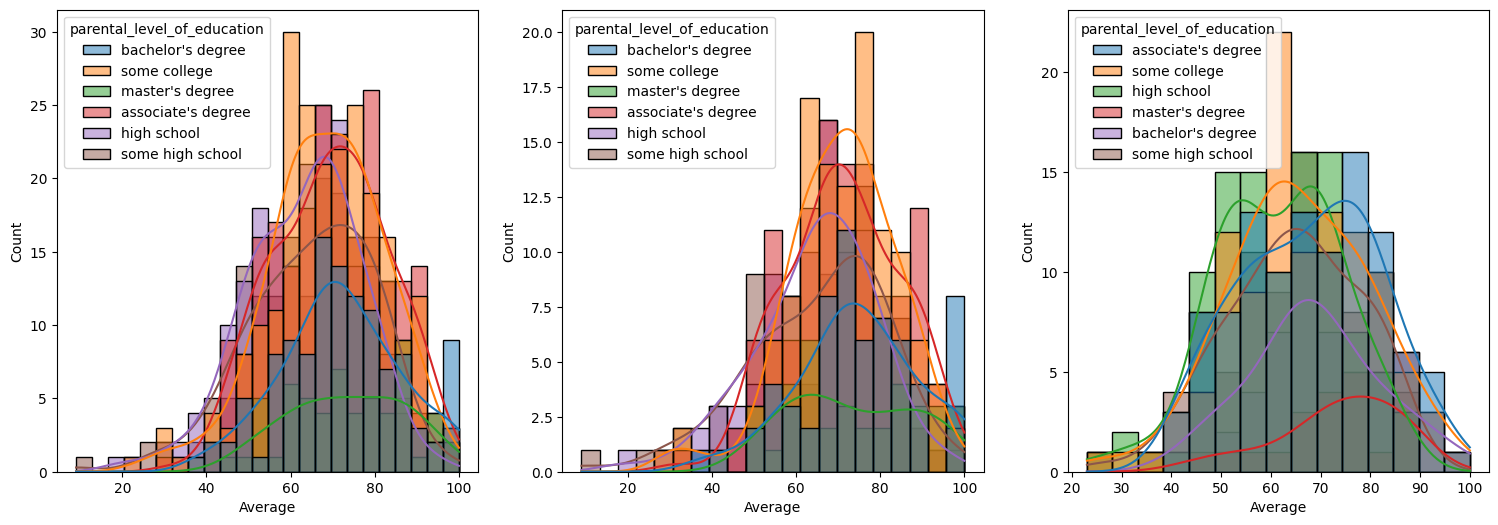

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(x='Average',data=df,kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x="Average",kde=True,hue="parental_level_of_education")
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="Average",kde=True,hue="parental_level_of_education")

<Axes: xlabel='Average', ylabel='Count'>

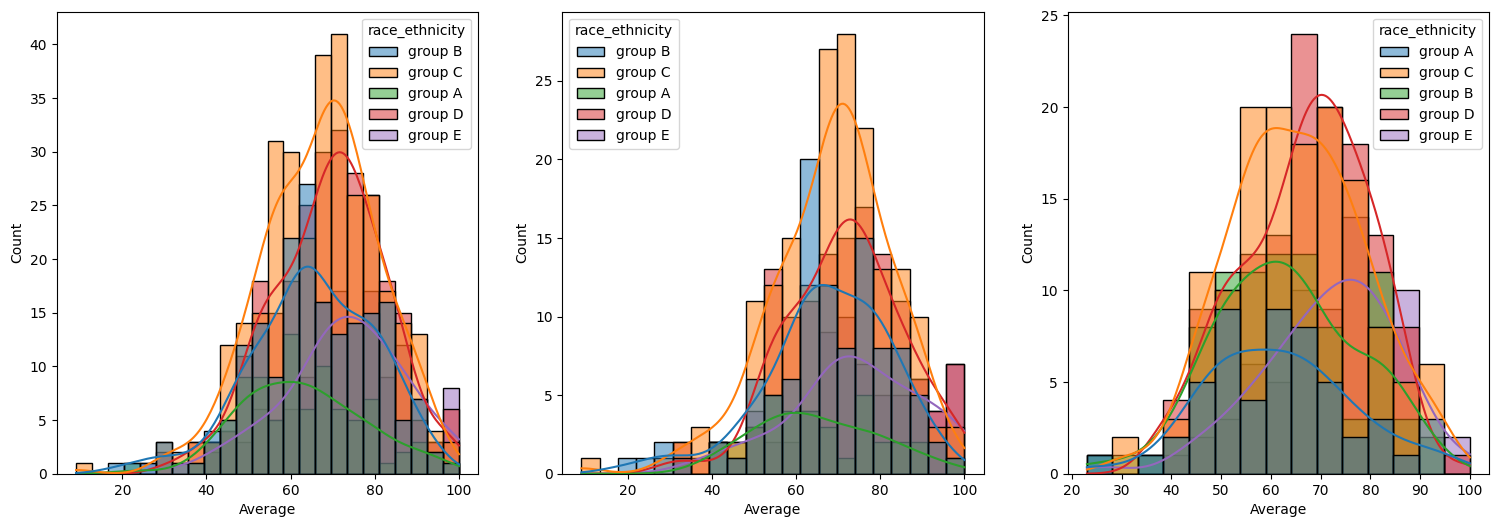

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(x='Average',data=df,kde=True,hue="race_ethnicity")
plt.subplot(142)
plt.title=('Female')
sns.histplot(data=df[df.gender=='female'],x="Average",kde=True,hue="race_ethnicity")
plt.subplot(143)
plt.title=('Male')
sns.histplot(data=df[df.gender=="male"],x="Average",kde=True,hue="race_ethnicity")

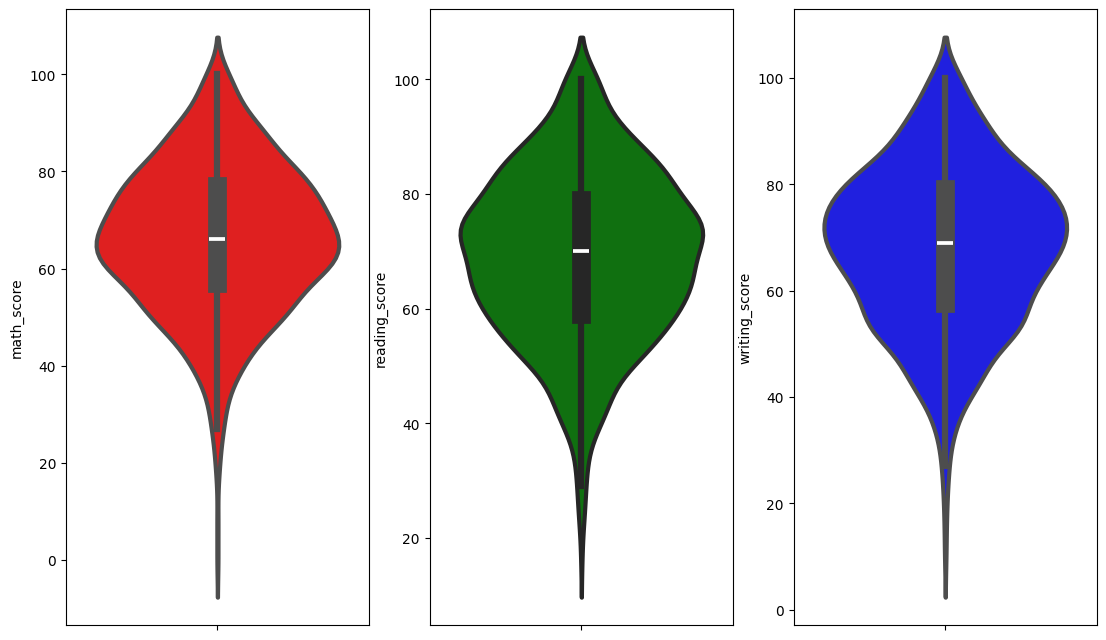

In [37]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title=('Math Score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title=('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title=('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()